<h1>Total Construction Spending Data Collection</h1>

1.2. Importing Libraries in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

<h2>2. Data Collection and Preparation</h2>

<h3>2.1. Importing the Dataset</h3>

In [2]:
#import dataset
data = pd.read_csv('total_construction_spending_dataset.csv')

#view dataset
print(data.head())


   ProjectID  Year  Region      ProjectType  TotalSpending  \
0  PROJ00001  2020     Sur            Salud   9.784573e+06   
1  PROJ00002  2015   Oeste      Residencial   5.793828e+07   
2  PROJ00003  2018  Centro      Residencial   1.000000e+08   
3  PROJ00004  2018  Centro  Infraestructura   4.398620e+07   
4  PROJ00005  2022     Sur  Infraestructura   5.281126e+07   

   PrePlanningSpending  DesignSpending  ConstructionSpending  ProjectDuration  \
0           1408404.21      1862413.96            6513754.60               55   
1           6077986.62     10465396.22           41394893.85               56   
2          13317788.59     14229424.50           72452786.91               43   
3           6361290.69      8014981.38           29609932.43               54   
4           7260861.48      9424190.26           36126206.53               32   

   NumberOfStakeholders  QualityAssuranceScore RiskLevel ComplianceStatus  \
0                    11                      8      Bajo       

<h3>2.2. Understanding the Variable</h3>

In [3]:
print (data.info())

print (data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProjectID              3000 non-null   object 
 1   Year                   3000 non-null   int64  
 2   Region                 3000 non-null   object 
 3   ProjectType            3000 non-null   object 
 4   TotalSpending          3000 non-null   float64
 5   PrePlanningSpending    3000 non-null   float64
 6   DesignSpending         3000 non-null   float64
 7   ConstructionSpending   3000 non-null   float64
 8   ProjectDuration        3000 non-null   int64  
 9   NumberOfStakeholders   3000 non-null   int64  
 10  QualityAssuranceScore  3000 non-null   int64  
 11  RiskLevel              3000 non-null   object 
 12  ComplianceStatus       3000 non-null   object 
 13  NumberOfChangeOrders   3000 non-null   int64  
 14  NumberOfInspections    3000 non-null   int64  
dtypes: f

<h3>2.3. Data Cleaning</h3>

In [4]:
#Handling Missing Values
print(data.isnull().sum())

ProjectID                0
Year                     0
Region                   0
ProjectType              0
TotalSpending            0
PrePlanningSpending      0
DesignSpending           0
ConstructionSpending     0
ProjectDuration          0
NumberOfStakeholders     0
QualityAssuranceScore    0
RiskLevel                0
ComplianceStatus         0
NumberOfChangeOrders     0
NumberOfInspections      0
dtype: int64


In [5]:
#Removing Duplicates
data = data.drop_duplicates()

<h3>Identification and Treatment of Outliers</h3>

<h3>Use the IQR method to detect and handle outliers:</h3>

In [6]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filtrar los datos que están dentro de los límites
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]




<h2>3. Exploratory Data Analysis (EDA)</h2>
<h3>3.1. Descriptive Analysis: Obtain basic statistics and distributions of key variables:</h3>

In [7]:
# Estadísticas descriptivas
print(data.describe())


             Year  TotalSpending  PrePlanningSpending  DesignSpending  \
count  3000.00000   3.000000e+03         3.000000e+03    3.000000e+03   
mean   2018.97100   6.043343e+07         5.992456e+06    8.990664e+06   
std       2.56509   3.738293e+07         4.235844e+06    5.881029e+06   
min    2015.00000   1.976023e+05         1.509031e+04    3.840107e+04   
25%    2017.00000   2.304919e+07         2.080657e+06    3.282507e+06   
50%    2019.00000   6.300576e+07         5.430493e+06    9.412882e+06   
75%    2021.00000   1.000000e+08         9.310947e+06    1.396001e+07   
max    2023.00000   1.000000e+08         1.498340e+07    1.999962e+07   

       ConstructionSpending  ProjectDuration  NumberOfStakeholders  \
count          3.000000e+03      3000.000000           3000.000000   
mean           4.545031e+07        36.343667             27.222333   
std            2.830792e+07        14.298708             13.287002   
min            1.441109e+05        12.000000              5.00

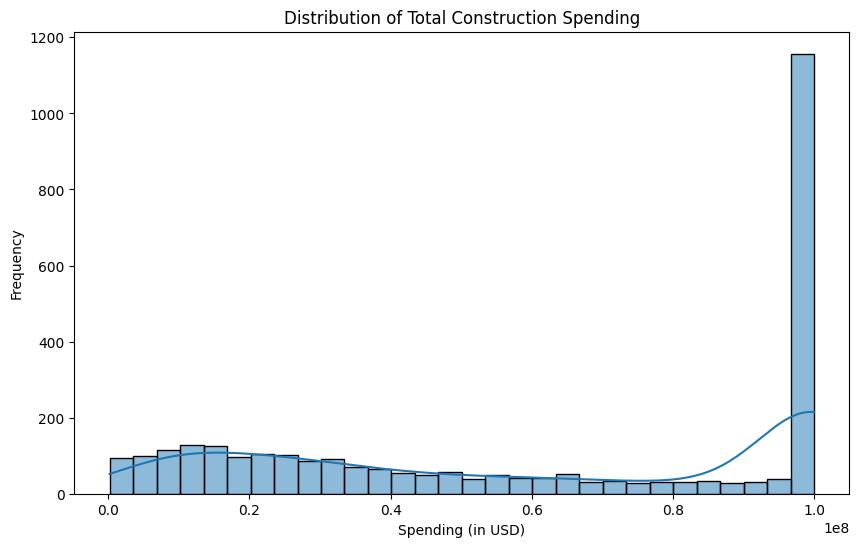

In [8]:
# Distribution of Construction Spending
plt.figure(figsize=(10, 6))
sns.histplot(data['TotalSpending'], bins=30, kde=True)
plt.title('Distribution of Total Construction Spending')
plt.xlabel('Spending (in USD)')
plt.ylabel('Frequency')
plt.show()


<h2>3.2. Categorical Analysis</h2>
<h3>Analyze spending by year, region, project type, etc.</h3>

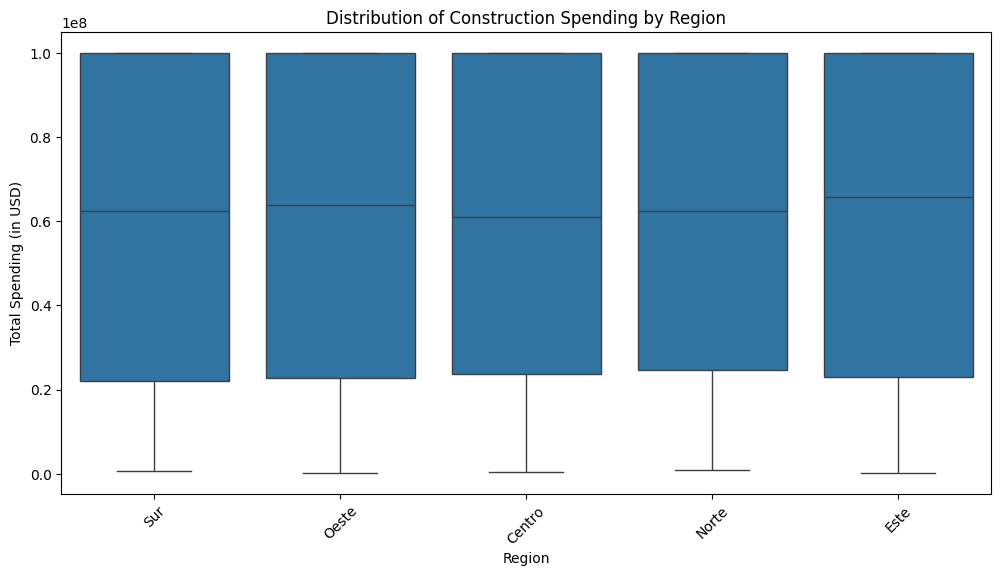

In [9]:
# Spending by Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='TotalSpending', data=data)
plt.title('Distribution of Construction Spending by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending (in USD)')
plt.xticks(rotation=45)
plt.show() 


### **3.3. Correlation Between Variables**

Identify significant correlations between variables:


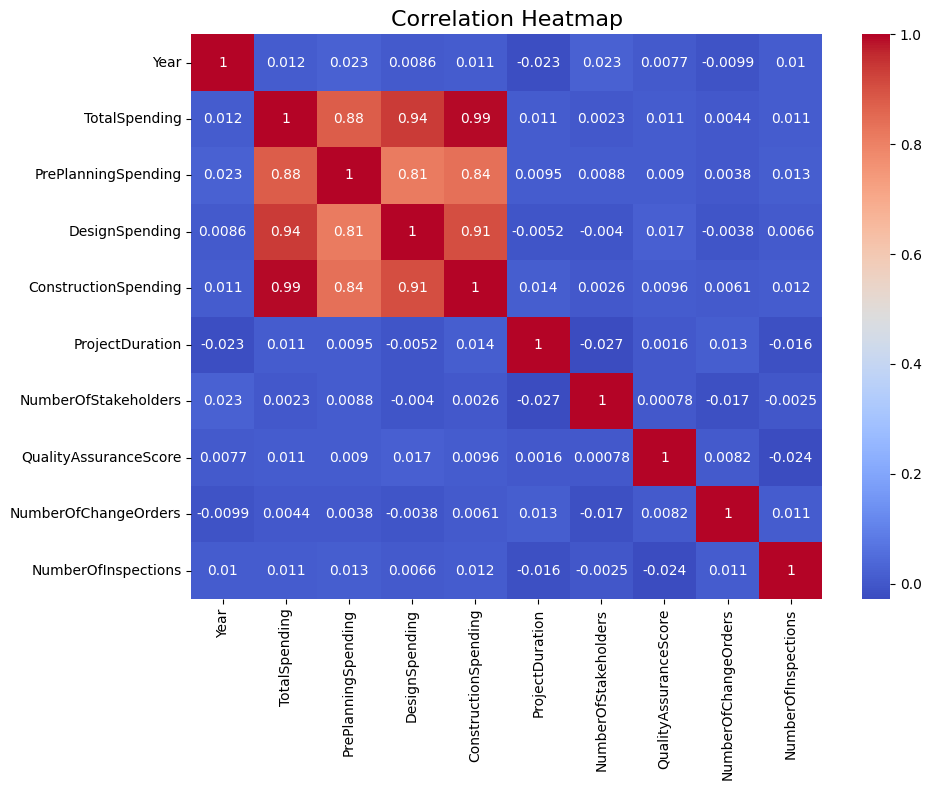

In [10]:
# Select only numerical columns to avoid errors in correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'float32', 'int64'])

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')

# Add title and display the plot
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()


<h1>Interpretation of the Results in the Correlation Heatmap</h1>

<h2>Variables Related to Spending</h2>
<p>
    <strong>TotalSpending (Total Spending)</strong> has an extremely high correlation with:
</p>
<ul>
    <li><strong>ConstructionSpending (Construction Spending):</strong> 0.99, almost 1, which means that the total spending is almost entirely determined by spending in the construction phase.</li>
    <li><strong>DesignSpending (Design Spending):</strong> 0.94, suggesting that design also significantly contributes to total spending, although not as much as construction.</li>
    <li><strong>PrePlanningSpending (Pre-Planning Spending):</strong> 0.88, also showing a strong correlation.</li>
</ul>
<p>
    This implies that pre-planning, design, and construction costs have a significant impact on the total project spending. However, spending on construction is the most influential on total spending, which is common in large construction projects.
</p>

<h2>Other Interesting Correlations</h2>
<ul>
    <li><strong>ConstructionSpending and DesignSpending:</strong> Correlation of 0.91. This suggests that projects that spend more on construction also tend to spend more on design, which makes sense since larger or more complex projects require more investment in both phases.</li>
    <li><strong>PrePlanningSpending and DesignSpending:</strong> Correlation of 0.81. Similar to the previous point, it shows that projects that invest in pre-planning also tend to invest in design.</li>
</ul>

<h2>Variables with Low or No Correlation</h2>
<p>
    <strong>NumberOfStakeholders</strong> and other variables such as <strong>QualityAssuranceScore</strong> or <strong>NumberOfChangeOrders</strong> have correlations close to 0 with the main spending metrics. This suggests that there is no direct relationship between the number of stakeholders, the number of change orders, or the quality assurance score with total spending, construction spending, or spending in other project phases.
</p>

<h2>Variables That Are Not Highly Correlated with Each Other</h2>
<p>
    <strong>ProjectDuration</strong> and <strong>TotalSpending:</strong> The correlation is close to 0 (0.011), indicating that project duration is not significantly related to total spending. This could indicate that longer projects are not necessarily those with higher expenses, or that other factors such as the type of project carry more weight.
</p>

<h2>Key Conclusions</h2>
<ul>
    <li>Spending on construction is the primary determinant of total spending in construction projects, which is expected since construction tends to be the most costly phase.</li>
    <li>The pre-planning and design phases are also strongly correlated with total spending, but to a lesser extent.</li>
    <li>Variables such as the number of stakeholders, project duration, and the number of change orders do not appear to have a direct relationship with spending in the different phases of the project.</li>
    <li>The quality assurance score is not directly related to project spending, which could indicate that quality is not necessarily affected by the budget allocated to the project.</li>
</ul>



### **4. Trend and Pattern Analysis**

### **4.1. Identification of Temporal Trends**

Analyze how construction spending has changed over time:


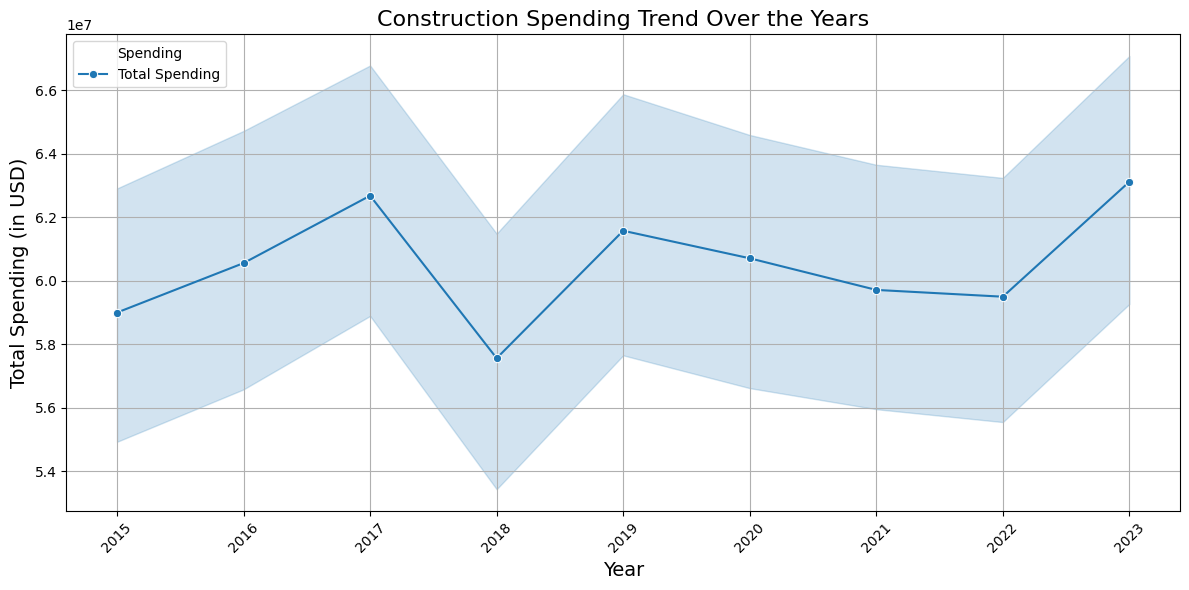

In [11]:
plt.figure(figsize=(12, 6))

# Add the trend line with data labels
sns.lineplot(x='Year', y='TotalSpending', data=data, marker='o', label='Total Spending')

# Title and axis labels
plt.title('Construction Spending Trend Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Spending (in USD)', fontsize=14)

# Show the legend
plt.legend(title='Spending')

# Enhance the plot visualization
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()


### **4.2. Analysis by Project Type**

If the dataset includes the project type, analyze spending by category:


C:\Users\valer\AppData\Local\Temp\ipykernel_35484\2061665294.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='ProjectType', y='TotalSpending', data=data, ci=None)


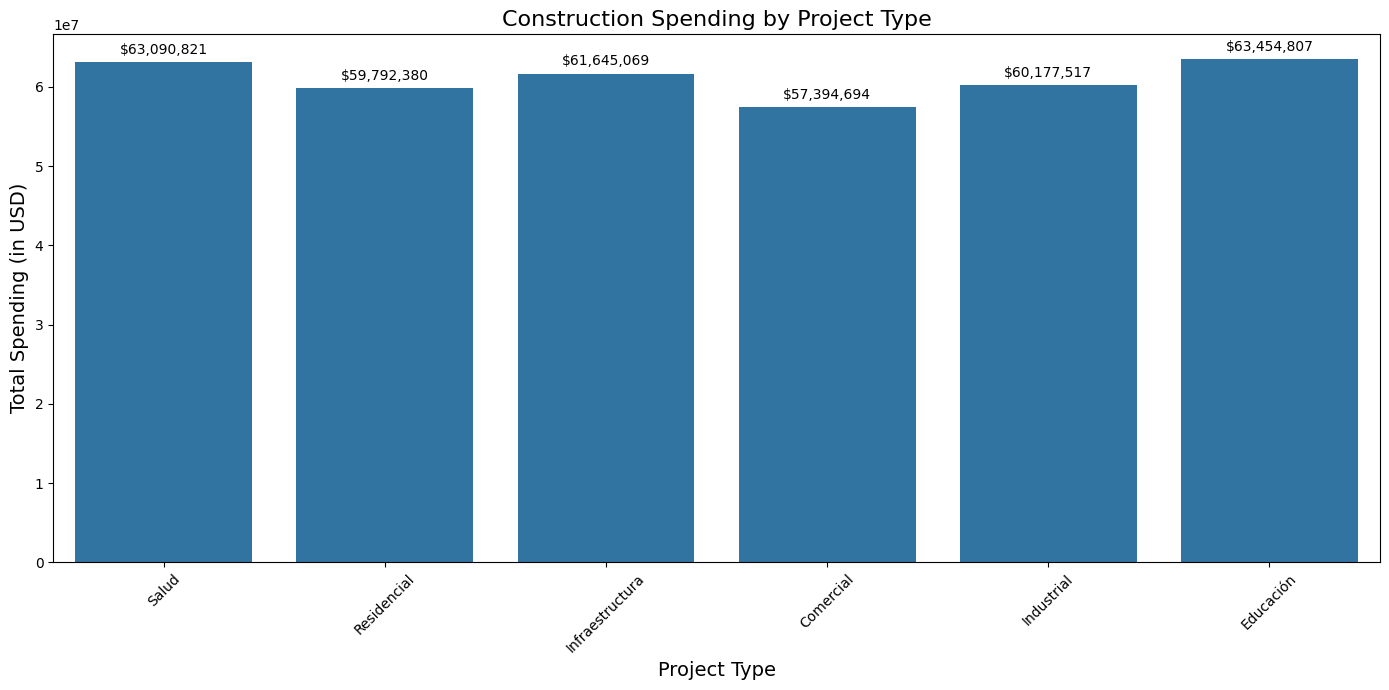

In [12]:
plt.figure(figsize=(14, 7))

# Create bar chart
barplot = sns.barplot(x='ProjectType', y='TotalSpending', data=data, ci=None)

# Add labels at the top of each bar
for p in barplot.patches:
    barplot.annotate(f'${p.get_height():,.0f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9),  # Shift text 9 points above the bar
                     textcoords='offset points', fontsize=10)

# Title and axis labels
plt.title('Construction Spending by Project Type', fontsize=16)
plt.xlabel('Project Type', fontsize=14)
plt.ylabel('Total Spending (in USD)', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


### **4.3. Geographical Analysis**

Visualize construction spending by geographic region:


C:\Users\valer\AppData\Local\Temp\ipykernel_35484\1755834180.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='Region', y='TotalSpending', data=data, ci=None)


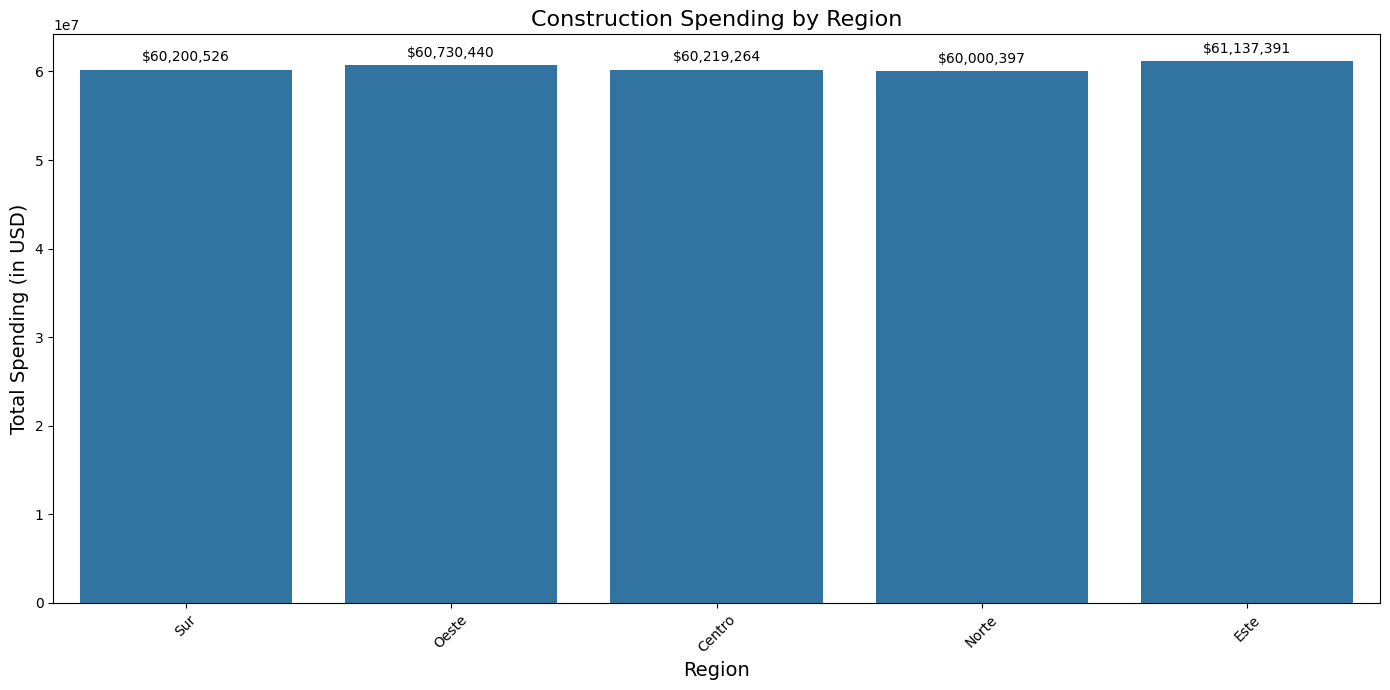

In [13]:


plt.figure(figsize=(14, 7))

# Create bar chart
barplot = sns.barplot(x='Region', y='TotalSpending', data=data, ci=None)

# Add labels at the top of each bar
for p in barplot.patches:
    barplot.annotate(f'${p.get_height():,.0f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9),  # Shift text 9 points above the bar
                     textcoords='offset points', fontsize=10)

# Title and axis labels
plt.title('Construction Spending by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Spending (in USD)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent overlaps
plt.tight_layout()

# Show the plot
plt.show()


### **5. Data Segmentation (Clustering)**

### **5.1. Selection of Variables for Clustering**


In [14]:
# Selection of variables for clustering
features = data[['TotalSpending', 'Year', 'ProjectType', 'Region']]  # Adjust according to relevant columns

# If 'ProjectType' and 'Region' are categorical, convert them into dummy variables
features = pd.get_dummies(features, columns=['ProjectType', 'Region'], drop_first=True)


### **5.2. Data Preprocessing**

Normalize the variables so that they all have the same scale:


In [15]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


### **5.3. Determination of the Optimal Number of Clusters**

Using the Elbow Method and the Silhouette Score to determine the appropriate number of clusters:


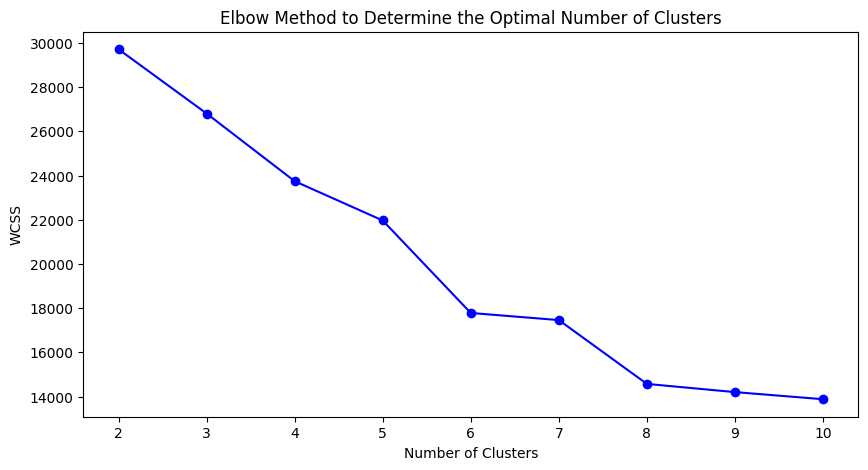

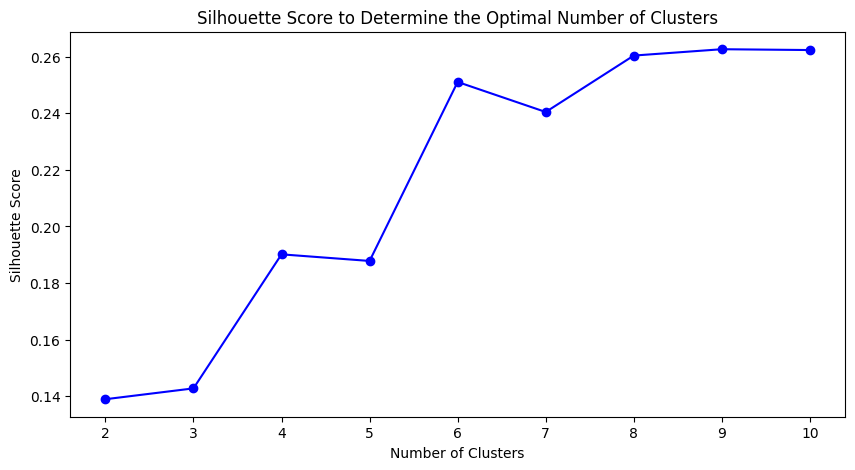

In [16]:

# Selection of variables for clustering
wcss = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine the Optimal Number of Clusters')
plt.show()

# Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score to Determine the Optimal Number of Clusters')
plt.show()




### **Interpretation:**

The **Elbow Method** aims to identify the point in the graph where the decrease in WCSS starts to become less significant, that is, when adding more clusters does not greatly improve the grouping.  
In this graph, you can observe that the WCSS decreases drastically at the beginning (from 2 to 5 clusters), but the decrease becomes slower from there.  
The "elbow" in the graph appears to be around the value of **5 clusters**. This would be the optimal number of clusters according to this method, since after 5, the improvement in WCSS is marginal.

### **Interpretation of the Silhouette Score:**

The **Silhouette Score** increases as you add more clusters, reaching its peak around **6 clusters** with a value close to **0.26**.  
A higher silhouette score indicates better separation of the clusters. In this case, clusters with **6 groups** seem to be better defined in terms of the silhouette metric, as this number maximizes the score.

### **Conclusions from Both Graphs:**

- The **Elbow Method** suggests that the optimal number of clusters is around **5**, as beyond that point, improvements in WCSS are less significant.
- The **Silhouette Score** suggests that the optimal number of clusters is **6**, as at this point, the highest value of the silhouette metric is achieved, indicating better separation of the groups.

### **Final Decision:**

Both methods provide clues about the optimal number of clusters. Based on these graphs, you can try with **5 or 6 clusters** and see which yields better results based on your interpretation of the data and the objective of your analysis.


### **5.4. Application of Clustering with K-Means**


In [17]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
data['Cluster'] = clusters

5.5. Evaluación de los Clusters

In [18]:
cluster_summary = data.groupby('Cluster').agg({
    'TotalSpending': 'mean',
    'Year': 'mean',
    # Add other variables if necessary
}).reset_index()

print(cluster_summary)


   Cluster  TotalSpending         Year
0        0   6.345481e+07  2018.941379
1        1   6.034352e+07  2019.016312
2        2   6.024411e+07  2018.841905
3        3   5.959466e+07  2018.987097


5.6. Visualización de los Clusters

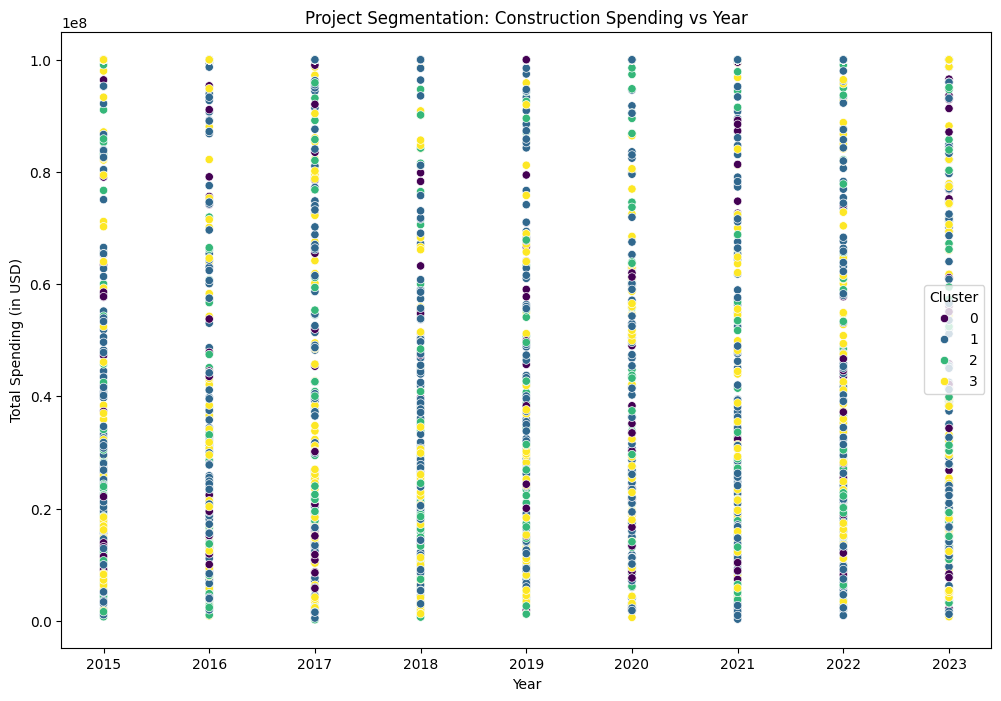

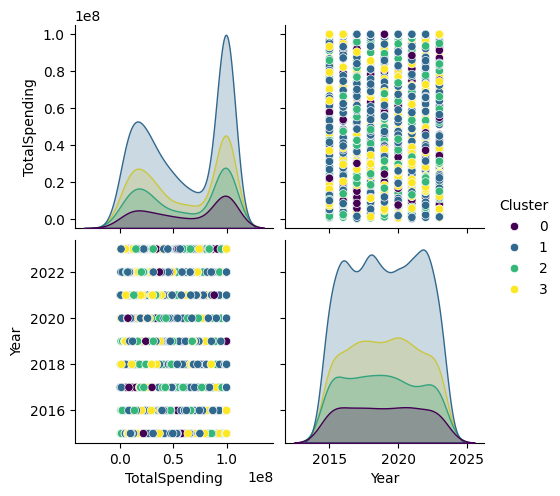

In [19]:
# Scatter plot of Spending vs Year with clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Year', y='TotalSpending', hue='Cluster', data=data, palette='viridis')
plt.title('Project Segmentation: Construction Spending vs Year')
plt.xlabel('Year')
plt.ylabel('Total Spending (in USD)')
plt.show()

# Pairplot to see all relationships
sns.pairplot(data, vars=['TotalSpending', 'Year'], hue='Cluster', palette='viridis')
plt.show()


### First Chart: Project Segmentation - Construction Spending vs Year

- **X-axis (Year)**: Indicates the year when the project was carried out.
- **Y-axis (Total Spending in USD)**: Represents the total construction spending for each project.
- **Colors (Clusters)**: Different colors represent the 4 identified clusters:
  - **Cluster 0**: Purple points.
  - **Cluster 1**: Blue points.
  - **Cluster 2**: Green points.
  - **Cluster 3**: Yellow points.

### Second Chart: Distribution of Total Spending and Year by Cluster

This combined chart includes a **density representation (KDE)** to visualize the distribution of both total spending and project year according to different clusters.

#### Density Charts:
- The top and right parts show the density curves for clusters based on total spending and year.
- Larger curves indicate where there is a higher concentration of projects for certain spending values and years.

#### Observations:
- Projects in **Clusters 1, 2, and 3** show higher distribution in terms of total spending between **0.5e8 and 1e8** (50 to 100 million USD).
- In terms of years, projects are more concentrated between **2015 and 2022**, with no significant peaks in any specific year.

#### General Observations:
- Most projects have construction spending ranging between **0 and 1e8** (100 million USD).
- There is a consistent distribution of projects across the years, and each cluster is similarly represented across all years.
- There doesn't seem to be a specific concentration of clusters in any particular year.


6.Dashbaord

In [20]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
from sklearn.cluster import KMeans

# Supongamos que ya tienes los datos cargados en el DataFrame 'data'
# Aplica clustering para generar la columna 'Cluster' si no existe
X = data[['TotalSpending', 'Year']]  # Reemplaza con las columnas adecuadas
kmeans = KMeans(n_clusters=4, random_state=0)
data['Cluster'] = kmeans.fit_predict(X)

# Initialize the Dash application
app = dash.Dash(__name__)

# Prepare cluster summary
cluster_summary = data.groupby('Cluster').agg({
    'TotalSpending': 'mean',
    'Year': 'mean',
}).reset_index()

# Dashboard Layout
app.layout = html.Div([
    html.H1("Construction Spending Analysis"),

    # Filters
    html.Div([
        html.Div([
            html.Label("Select Year:"),
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': year, 'value': year} for year in sorted(data['Year'].unique())],
                value=sorted(data['Year'].unique()),
                multi=True
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),

        html.Div([
            html.Label("Select Region:"),
            dcc.Dropdown(
                id='region-dropdown',
                options=[{'label': region, 'value': region} for region in sorted(data['Region'].unique())],
                value=sorted(data['Region'].unique()),
                multi=True
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),
    ]),

    # Scatter Plot: Spending vs Year
    dcc.Graph(id='scatter-plot'),

    # Bar Chart: Average Spending by Cluster
    html.H2("Cluster Summary"),
    dcc.Graph(id='cluster-bar'),

    # Line Chart: Spending Trend by Year
    html.H2("Construction Spending Trend by Year"),
    dcc.Graph(id='trend-line'),
])

# Callback to update the scatter plot with labels
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('year-dropdown', 'value'),
     Input('region-dropdown', 'value')]
)
def update_scatter(selected_years, selected_regions):
    filtered_data = data[data['Year'].isin(selected_years) & data['Region'].isin(selected_regions)]
    fig = px.scatter(
        filtered_data, x='Year', y='TotalSpending', color='Cluster',
        title='Construction Spending vs Year by Cluster',
        hover_data=['Region']
    )
    # Adding labels for each point
    fig.update_traces(textposition='top center')
    return fig

# Callback to update the clusters bar chart with labels
@app.callback(
    Output('cluster-bar', 'figure'),
    [Input('year-dropdown', 'value'),
     Input('region-dropdown', 'value')]
)
def update_cluster_bar(selected_years, selected_regions):
    filtered_data = data[data['Year'].isin(selected_years) & data['Region'].isin(selected_regions)]
    cluster_summary = filtered_data.groupby('Cluster').agg({'TotalSpending': 'mean'}).reset_index()
    fig = px.bar(
        cluster_summary, x='Cluster', y='TotalSpending',
        title='Average Spending by Cluster',
        labels={'TotalSpending': 'Average Spending (in USD)', 'Cluster': 'Cluster'}
    )
    # Adding labels on top of the bars
    fig.update_traces(texttemplate='$%{y:,.2f}', textposition='outside')
    return fig

# Callback to update the spending trend by year with labels
@app.callback(
    Output('trend-line', 'figure'),
    [Input('year-dropdown', 'value'),
     Input('region-dropdown', 'value')]
)
def update_trend_line(selected_years, selected_regions):
    filtered_data = data[data['Year'].isin(selected_years) & data['Region'].isin(selected_regions)]
    trend = filtered_data.groupby('Year').agg({'TotalSpending': 'sum'}).reset_index()
    fig = px.line(
        trend, x='Year', y='TotalSpending',
        title='Total Construction Spending Trend by Year',
        markers=True
    )
    # Adding labels on the line points
    fig.update_traces(texttemplate='$%{y:,.2f}', textposition='top center')
    return fig

# Run the application
if __name__ == '__main__':
    app.run_server(debug=True)
